In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Loading Dataset And Understanding Shape of Dataset


In [2]:
df = pd.read_csv("Retail_Sales_Dataset.csv")
df.shape

(1000, 9)

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df_1 = df[['Gender','Age','Product Category','Quantity','Price per Unit','Total Amount']]

In [10]:
df_1.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


In [14]:
Total_revenue = df['Total Amount'].sum()
Total_revenue

456000

In [15]:
Total_quantity_sold = df['Quantity'].sum()
Total_quantity_sold

2514

In [11]:
Total_quantity_per_product_category = df.groupby('Product Category')['Quantity'].sum()
Total_quantity_per_product_category

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

In [12]:
Total_amount_per_product_category = df.groupby('Product Category')['Total Amount'].sum()
Total_amount_per_product_category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [16]:
Total_amount_spent_by_gender = df.groupby('Gender')['Total Amount'].sum()
Total_amount_spent_by_gender 

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

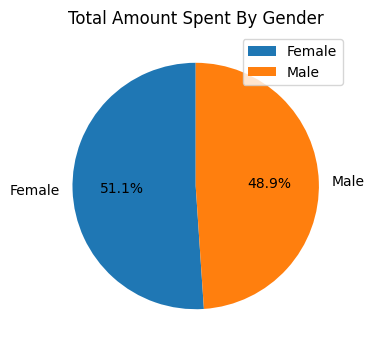

In [75]:
plt.figure(figsize = (4,4))
plt.pie(Total_amount_spent_by_gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle=90)
plt.title('Total Amount Spent By Gender')
plt.legend()
plt.show()

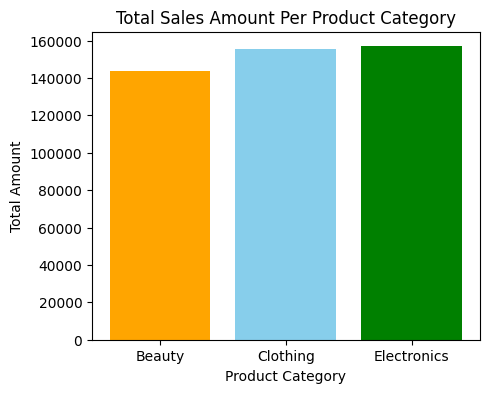

In [36]:
plt.figure(figsize = (5,4))
plt.bar(Total_amount_per_product_category.index,Total_amount_per_product_category.values,
        color = ['Orange','Skyblue','Green'])
plt.title("Total Sales Amount Per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

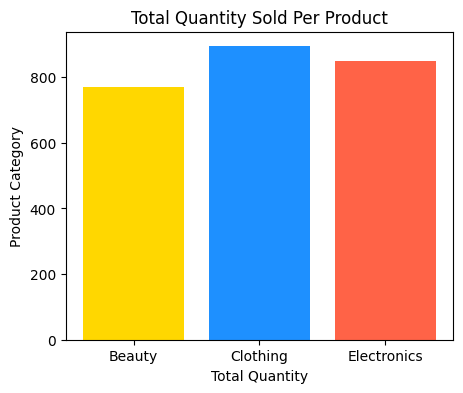

In [42]:
plt.figure(figsize = (5,4))
colors = ['#FFD700',  # Gold
          '#1E90FF',  # Dodger Blue
          '#FF6347'] #
plt.bar(Total_quantity_per_product_category.index,Total_quantity_per_product_category.values,
        color = colors)
plt.title("Total Quantity Sold Per Product")
plt.xlabel("Total Quantity")
plt.ylabel("Product Category")
plt.show()

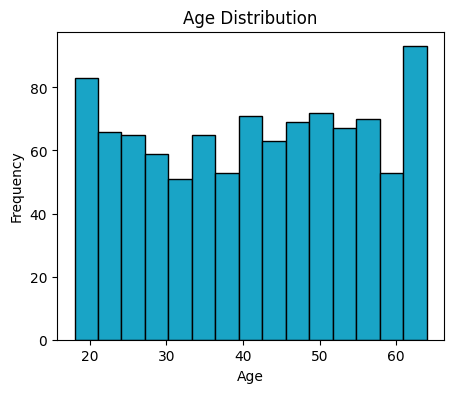

In [76]:
plt.figure(figsize=(5,4))
plt.hist(df['Age'],bins = 15, color="#19A4C6",edgecolor ='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [51]:
df_copy = df.copy()

In [53]:
df_copy.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [54]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'],format = '%Y-%m-%d')
df_copy.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [57]:
print(df_copy['Date'].dt.year.unique())

[2023 2024]


In [58]:
yearly_sales = df_copy.groupby(df_copy['Date'].dt.year)['Total Amount'].sum()
yearly_sales

Date
2023    454470
2024      1530
Name: Total Amount, dtype: int64

In [59]:
monthly_sales = df_copy.groupby(df_copy['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales

Date
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64

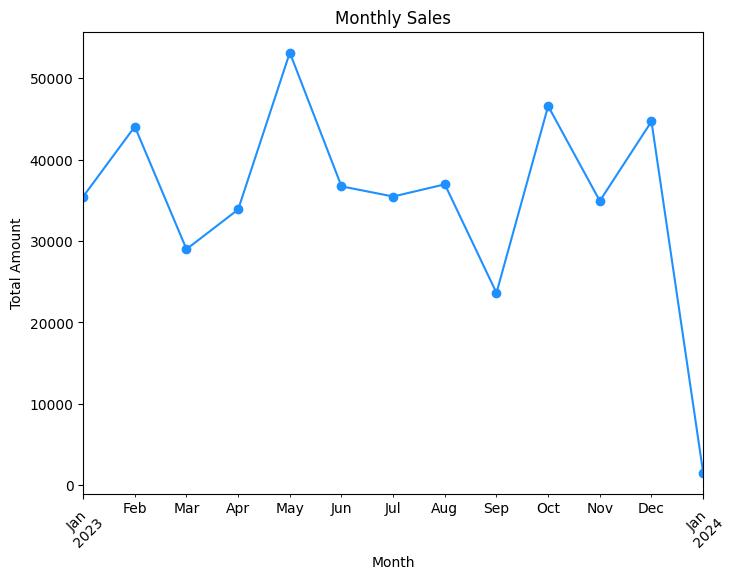

In [61]:
plt.figure(figsize = (8,6))
monthly_sales.plot(kind='line',marker='o',color='#1E90FF')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

In [62]:
monthly_sales_2023 = monthly_sales[monthly_sales.index.to_timestamp().year==2023]


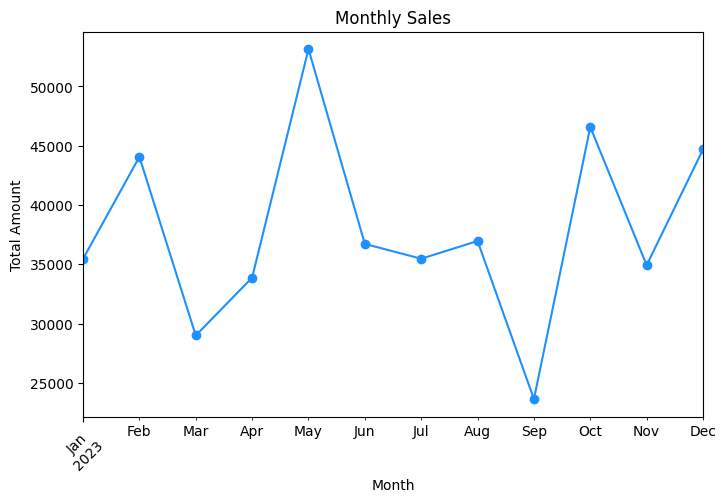

In [64]:
plt.figure(figsize=(8,5))
monthly_sales_2023.plot(kind='line',marker='o',color='#1E90FF')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

In [74]:
print(f"Month With Maximum Sales : {monthly_sales_2023[monthly_sales_2023==monthly_sales_2023.max()].index[0]},\nSales Amount = {monthly_sales_2023.max()}")

Month With Maximum Sales : 2023-05,
Sales Amount = 53150
